In [1]:
import modin.pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_csv('ds_salaries.csv').drop(columns='Unnamed: 0')
df.head()

To remove this warning, run the following python code before doing dataframe operations:

    from distributed import Client

    client = Client()

Perhaps you already have a cluster running?
Hosting the HTTP server on port 53981 instead


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------------------  --------------  ----- 
 0   work_year           607 non-null    int64
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: object(7), int64(4)
memory usage: 52.3 KB


In [4]:
df.assign(
    work_year = lambda x: x.work_year.astype('category'),
    experience_level = lambda x: x.experience_level.astype('category'),
    employment_type = lambda x: x.employment_type.astype('category'),
    salary_currency = lambda x: x.salary_currency.astype('category'),
    employee_residence = lambda x: x.employee_residence.astype('category'),
    remote_ratio = lambda x: x.remote_ratio.astype('category'),
    company_location = lambda x: x.company_location.astype('category'),
    company_size = lambda x: x.company_size.astype('category')
)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [5]:
df.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.00,607.00,607.00,607.00
mean,2021.41,324000.06,112297.87,70.92
std,0.69,1544357.49,70957.26,40.71
min,2020.00,4000.00,2859.00,0.00
25%,2021.00,70000.00,62726.00,50.00
50%,2022.00,115000.00,101570.00,100.00
75%,2022.00,165000.00,150000.00,100.00
max,2022.00,30400000.00,600000.00,100.00


Please refer to https://modin.readthedocs.io/en/stable/supported_apis/defaulting_to_pandas.html for explanation.


<AxesSubplot:title={'center':'Experience Level in Data Science Positions'}>

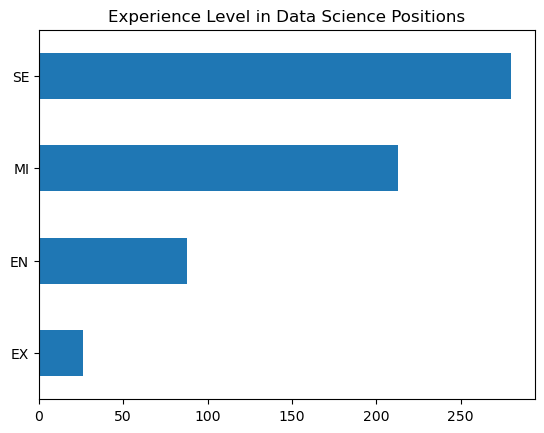

In [7]:
# Experience level. EN = entry level, MI = mid-level, SE = senior level, EX = executive level
df.experience_level.value_counts().iloc[3::-1].plot(kind='barh', title='Experience Level in Data Science Positions')

<AxesSubplot:title={'center':'Employment Type in Data Science Positions'}>

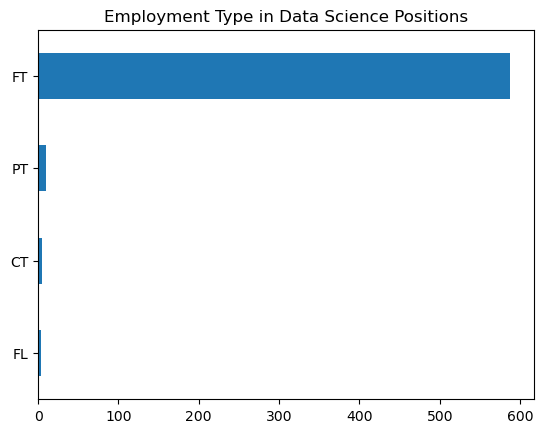

In [8]:
# Employment type. PT = Part time, FT = full time, CT = contract, FL = freelance
df.employment_type.value_counts().iloc[3::-1].plot(kind='barh', title='Employment Type in Data Science Positions')

<AxesSubplot:title={'center':'Top 15 Data Science Positions'}>

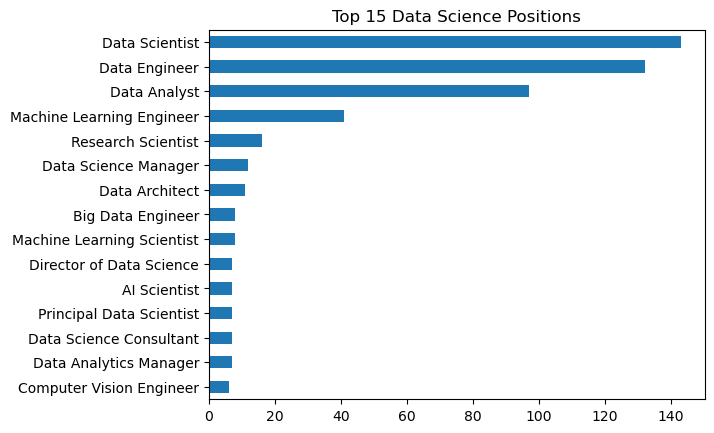

In [9]:
# Job title
df.job_title.value_counts().iloc[14::-1].plot(kind='barh', title='Top 15 Data Science Positions')

In [10]:
df.query('job_title == "Data Analyst"').experience_level.value_counts(normalize=True)

SE   0.56
MI   0.30
EN   0.12
EX   0.02
Name: experience_level, dtype: float64

In [11]:
df.query('job_title == "Data Scientist"').experience_level.value_counts(normalize=True)
# No executive-level positions suggests that Data Scientist roles are terminal.

SE   0.43
MI   0.42
EN   0.15
Name: experience_level, dtype: float64

In [12]:
df.query('job_title == "Data Engineer"').experience_level.value_counts(normalize=True)
# There are twice as many data engineers in executive-level roles than data analysts.

SE   0.48
MI   0.40
EN   0.09
EX   0.03
Name: experience_level, dtype: float64

In [13]:
bigThreeRoles = df.query('job_title == "Data Analyst" or job_title == "Data Scientist" or job_title == "Data Engineer"')
bigThreeRoles.experience_level.groupby(bigThreeRoles.job_title).value_counts()

AttributeError: 'SeriesGroupBy' object has no attribute 'value_counts'